In [11]:
'''导入一些必要的包'''
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False


##数据描述及探索性分析

In [12]:
'''导入数据'''
train = pd.read_csv('train.csv')
test = pd.read_csv('testA.csv')

In [13]:
'''样本个数和特征维度'''
train.shape

(800000, 47)

In [14]:
'''样本个数和特征维度'''
test.shape

(200000, 46)

In [15]:
'''样本的特征'''
train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [16]:
'''数据集的一些基本信息（缺失情况、类型等）'''
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [17]:
'''数据的描述性分析'''
# train.describe()
train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
id,800000.0,399999.500000,230940.252013,0.00,199999.75,399999.500,599999.25,799999.00
loanAmnt,800000.0,14416.818875,8716.086178,500.00,8000.00,12000.000,20000.00,40000.00
term,800000.0,3.482745,0.855832,3.00,3.00,3.000,3.00,5.00
interestRate,800000.0,13.238391,4.765757,5.31,9.75,12.740,15.99,30.99
installment,800000.0,437.947723,261.460393,15.69,248.45,375.135,580.71,1715.42


In [18]:
'''数值类型（连续变量、离散型变量和单值变量）'''
numerical_feature = list(train.select_dtypes(exclude=['object']).columns)
print(len(numerical_feature))  ## 42
numerical_feature


42


['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [19]:
# 连续型变量
serial_feature = []
# 离散型变量
discrete_feature = []
# 单值变量
unique_feature = []

for fea in numerical_feature:
    temp = train[fea].nunique()# 返回的是唯一值的个数
    if temp == 1:
        unique_feature.append(fea)
     # 自定义变量的值的取值个数小于10就为离散型变量    
    elif temp <= 10:
        discrete_feature.append(fea)
    else:
        serial_feature.append(fea)


In [20]:
'''连续型变量'''
serial_feature

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

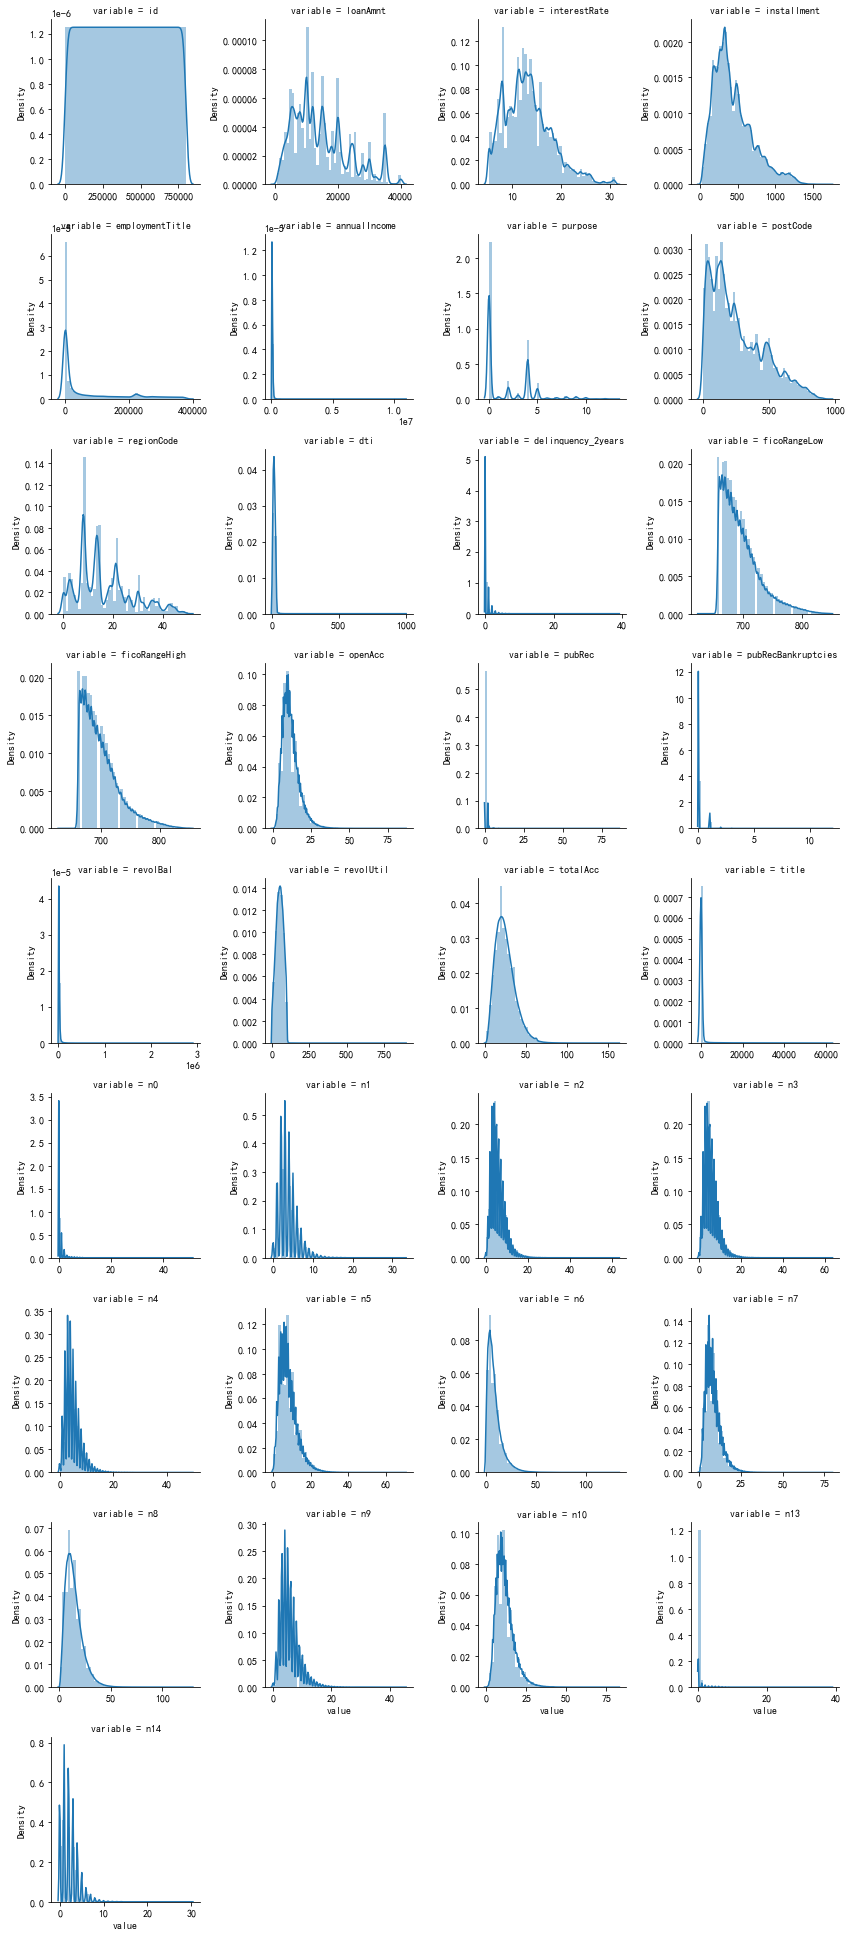

In [21]:
'''每个数字特征得分布可视化'''
f = pd.melt(train, value_vars=serial_feature)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False,palette="Set1")
g = g.map(sns.distplot, "value")


Text(0.5, 0, 'loanAmnt')

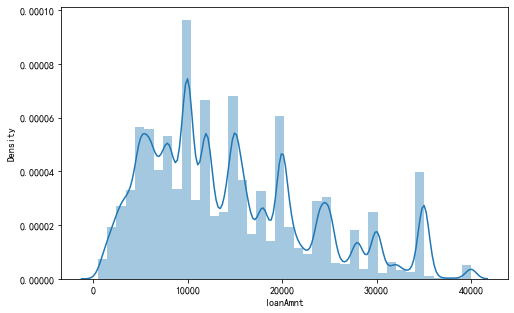

In [22]:
'''贷款金额 loanAmnt 的分布情况'''
plt.figure(1 , figsize = (8 , 5))
sns.distplot(train.loanAmnt,bins=40)
plt.xlabel('loanAmnt')


Text(0, 0.5, 'Density')

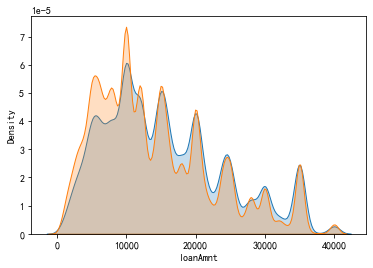

In [23]:
'''违约与不违约两类样本的贷款金额分布情况'''
label=train['isDefault']
sns.kdeplot(train.loanAmnt[label[label==1].index], label='1', shade=True)#违约
sns.kdeplot(train.loanAmnt[label[label==0].index], label='0', shade=True)#没有违约
plt.xlabel('loanAmnt')
plt.ylabel('Density')


Text(0.5, 0, 'annualIncome')

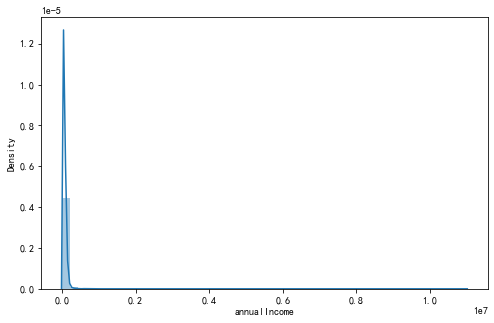

In [24]:
'''年收入的分布情况'''
plt.figure(1 , figsize = (8 , 5))
sns.distplot(train['annualIncome'])
plt.xlabel('annualIncome')

In [25]:
'''离散型变量'''
discrete_feature

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'n11',
 'n12']

In [26]:
for f in discrete_feature:
    print(f, '类型数：', train[f].nunique())


term 类型数： 2
homeOwnership 类型数： 6
verificationStatus 类型数： 3
isDefault 类型数： 2
initialListStatus 类型数： 2
applicationType 类型数： 2
n11 类型数： 5
n12 类型数： 5


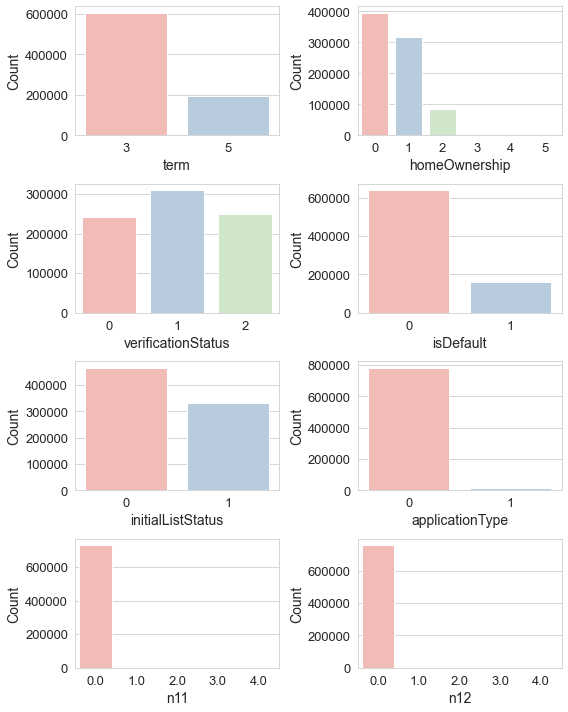

In [27]:
'''离散型特征可视化呈现'''
df_ = train[discrete_feature]
sns.set_style("whitegrid") # 使用whitegrid主题
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(8,10))
for i, item in enumerate(df_):
    plt.subplot(4,2,(i+1))
    #ax=df[item].value_counts().plot(kind = 'bar')
    ax=sns.countplot(item,data = df_,palette="Pastel1")
    plt.xlabel(str(item),fontsize=14)   
    plt.ylabel('Count',fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    #plt.title("Churn by "+ str(item))
    i=i+1
    plt.tight_layout()
plt.show()


In [28]:
'''单值变量'''
unique_feature



['policyCode']

In [29]:
'''分类型特征'''
category_feature = list(filter(lambda x: x not in numerical_feature,list(train.columns)))
category_feature

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [30]:
'''分类型特征的结构'''
train[category_feature]

,grade,subGrade,employmentLength,issueDate,earliesCreditLine
0,E,E2,2 years,2014-07-01,Aug-2001
1,D,D2,5 years,2012-08-01,May-2002
2,D,D3,8 years,2015-10-01,May-2006
3,A,A4,10+ years,2015-08-01,May-1999
4,C,C2,NaN,2016-03-01,Aug-1977
...,...,...,...,...,...
799995,C,C4,7 years,2016-07-01,Aug-2011
799996,A,A4,10+ years,2013-04-01,May-1989
799997,C,C3,10+ years,2015-10-01,Jul-2002
799998,A,A4,10+ years,2015-02-01,Jan-1994


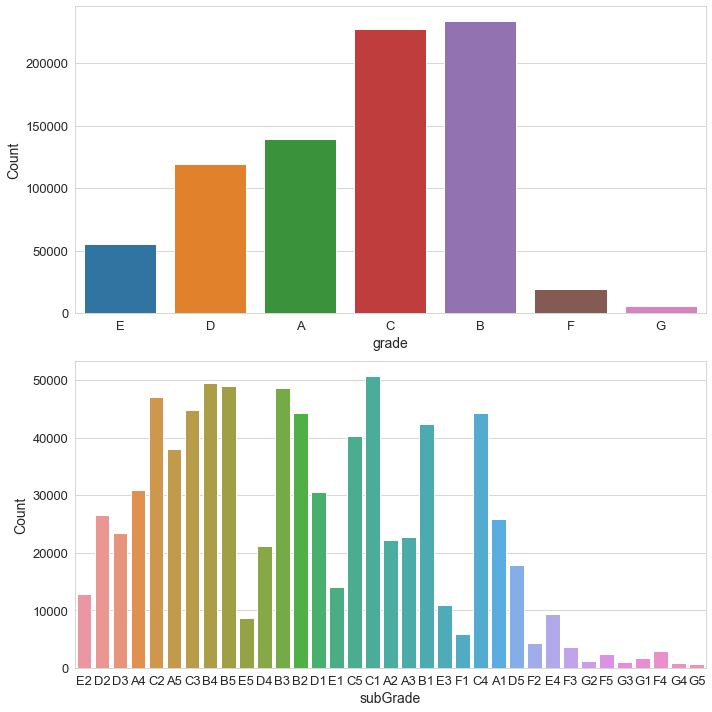

In [31]:
'''分类型特征可视化呈现'''
df_category = train[['grade', 'subGrade']]
sns.set_style("whitegrid") # 使用whitegrid主题
color = sns.color_palette()
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
for i, item in enumerate(df_category):
    plt.subplot(2,1,(i+1))
    #ax=df[item].value_counts().plot(kind = 'bar')
    ax=sns.countplot(item,data = df_category)
    plt.xlabel(str(item),fontsize=14)   
    plt.ylabel('Count',fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    #plt.title("Churn by "+ str(item))
    i=i+1
    plt.tight_layout()
plt.show()

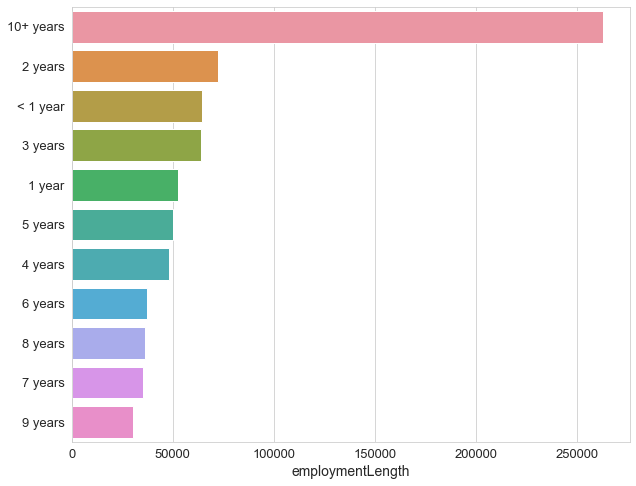

In [32]:
'''分类型特征可视化呈现'''
plt.figure(1 , figsize = (10 , 8))
sns.barplot(train["employmentLength"].value_counts(dropna=False),
            train["employmentLength"].value_counts(dropna=False).keys())
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('employmentLength',fontsize=14)   
plt.show()


In [33]:
'''统计一下issueDate与earliesCreditLine类别的数量'''
for i in train[['issueDate', 'earliesCreditLine']]:
    print(train[i].value_counts())
    print()

2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
              ...  
2007-08-01       23
2007-07-01       21
2008-09-01       19
2007-09-01        7
2007-06-01        1
Name: issueDate, Length: 139, dtype: int64

Aug-2001    5567
Sep-2003    5403
Aug-2002    5403
Oct-2001    5258
Aug-2000    5246
            ... 
Oct-2015       1
Apr-1958       1
May-1960       1
Jun-1958       1
Nov-1954       1
Name: earliesCreditLine, Length: 720, dtype: int64



In [34]:
'''查看目标变量（标签）是否平衡'''
abel=train.isDefault             
label.value_counts()/len(label)

0    0.800488
1    0.199513
Name: isDefault, dtype: float64

<AxesSubplot:xlabel='isDefault', ylabel='count'>

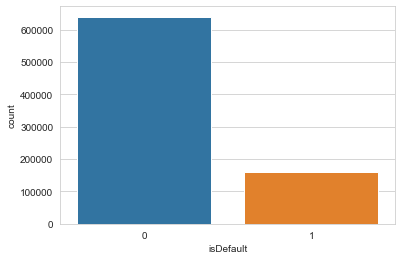

In [35]:
'''目标变量可视化'''
sns.countplot(label)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1 year'),
  Text(1, 0, '10+ years'),
  Text(2, 0, '2 years'),
  Text(3, 0, '3 years'),
  Text(4, 0, '4 years'),
  Text(5, 0, '5 years'),
  Text(6, 0, '6 years'),
  Text(7, 0, '7 years'),
  Text(8, 0, '8 years'),
  Text(9, 0, '9 years'),
  Text(10, 0, '< 1 year')])

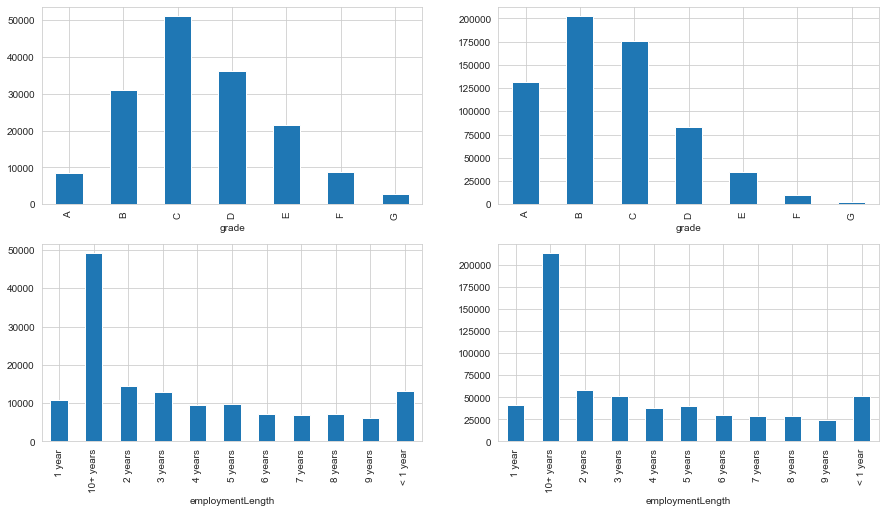

In [36]:
'''目标变量和分类类别之间的分布关系'''
train_loan_fr = train.loc[train['isDefault'] == 1]
train_loan_nofr = train.loc[train['isDefault'] == 0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8)) 
# 目标变量为1时候grade的分布
train_loan_fr.groupby("grade").size().plot.bar(ax=ax1)
# 目标变量为0时候grade的分布
train_loan_nofr.groupby("grade")["grade"].count().plot.bar(ax=ax2)
# 目标变量为1时候employmentLength的分布
train_loan_fr.groupby("employmentLength").size().plot.bar(ax=ax3)
# 目标变量为0时候employmentLength的分布
train_loan_nofr.groupby("employmentLength")["employmentLength"].count().plot.bar(ax=ax4)
plt.xticks(rotation=90)

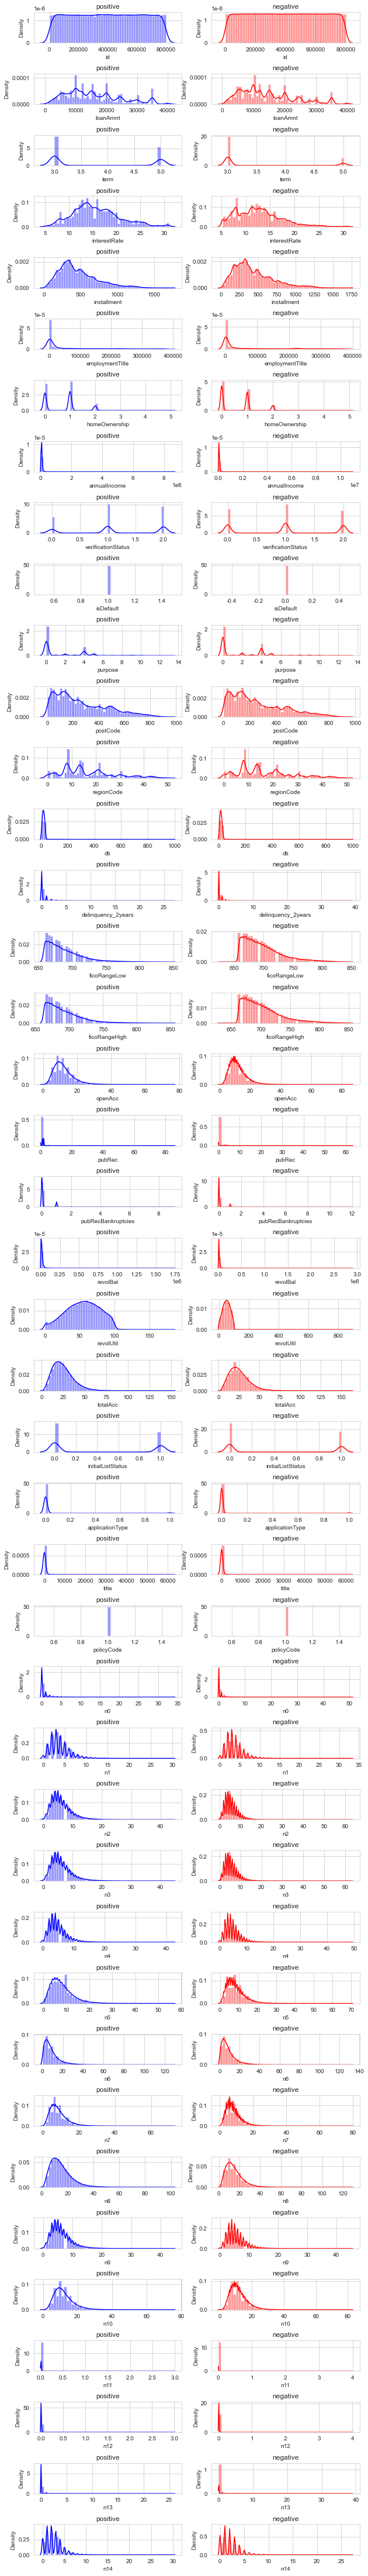

In [37]:
'''正负样本的数据差异'''
train_positve = train[train['isDefault'] == 1]
train_negative = train[train['isDefault'] != 1]
f, ax = plt.subplots(len(numerical_feature),2,figsize = (10,80))
for i,col in enumerate(numerical_feature):
    sns.distplot(train_positve[col],ax = ax[i,0],color = "blue")
    ax[i,0].set_title("positive")
    sns.distplot(train_negative[col],ax = ax[i,1],color = 'red')
    ax[i,1].set_title("negative")
plt.subplots_adjust(hspace = 1)


In [38]:
'''缺省值查看'''
# 去掉标签
X_missing = train.drop(['isDefault'],axis=1)
# 查看缺失情况
missing = X_missing.isna().sum()
missing = pd.DataFrame(data={'特征': missing.index,'缺失值个数':missing.values})
#通过~取反，选取不包含数字0的行
missing = missing[~missing['缺失值个数'].isin([0])]
# 缺失比例
missing['缺失比例'] =  missing['缺失值个数']/X_missing.shape[0]
missing


,特征,缺失值个数,缺失比例
7,employmentTitle,1,0.000001
8,employmentLength,46799,0.058499
14,postCode,1,0.000001
16,dti,239,0.000299
22,pubRecBankruptcies,405,0.000506
24,revolUtil,531,0.000664
29,title,1,0.000001
31,n0,40270,0.050338
32,n1,40270,0.050338
33,n2,40270,0.050338


<AxesSubplot:>

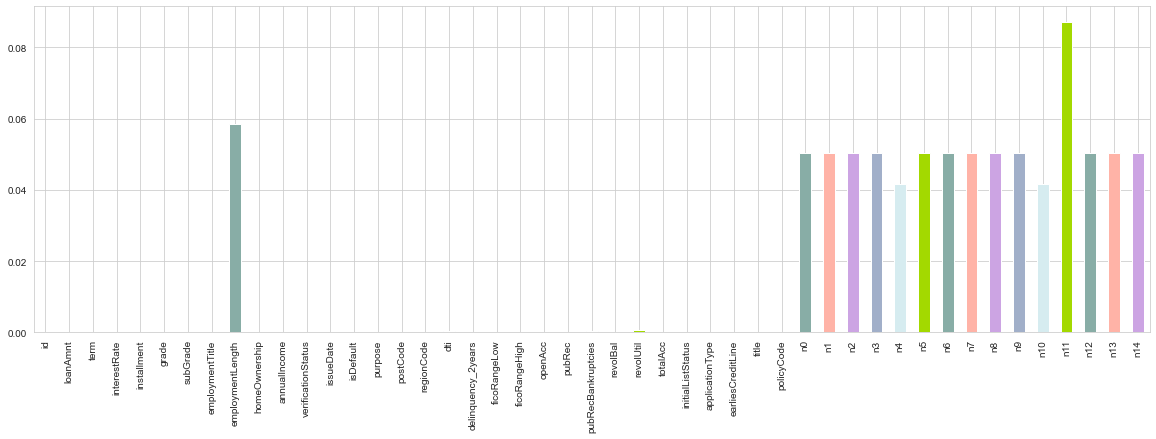

In [39]:
'''缺失值可视化'''
(train.isnull().sum()/len(train)).plot.bar(figsize = (20,6),color=['#d6ecf0','#a3d900','#88ada6','#ffb3a7','#cca4e3','#a1afc9'])

<AxesSubplot:>

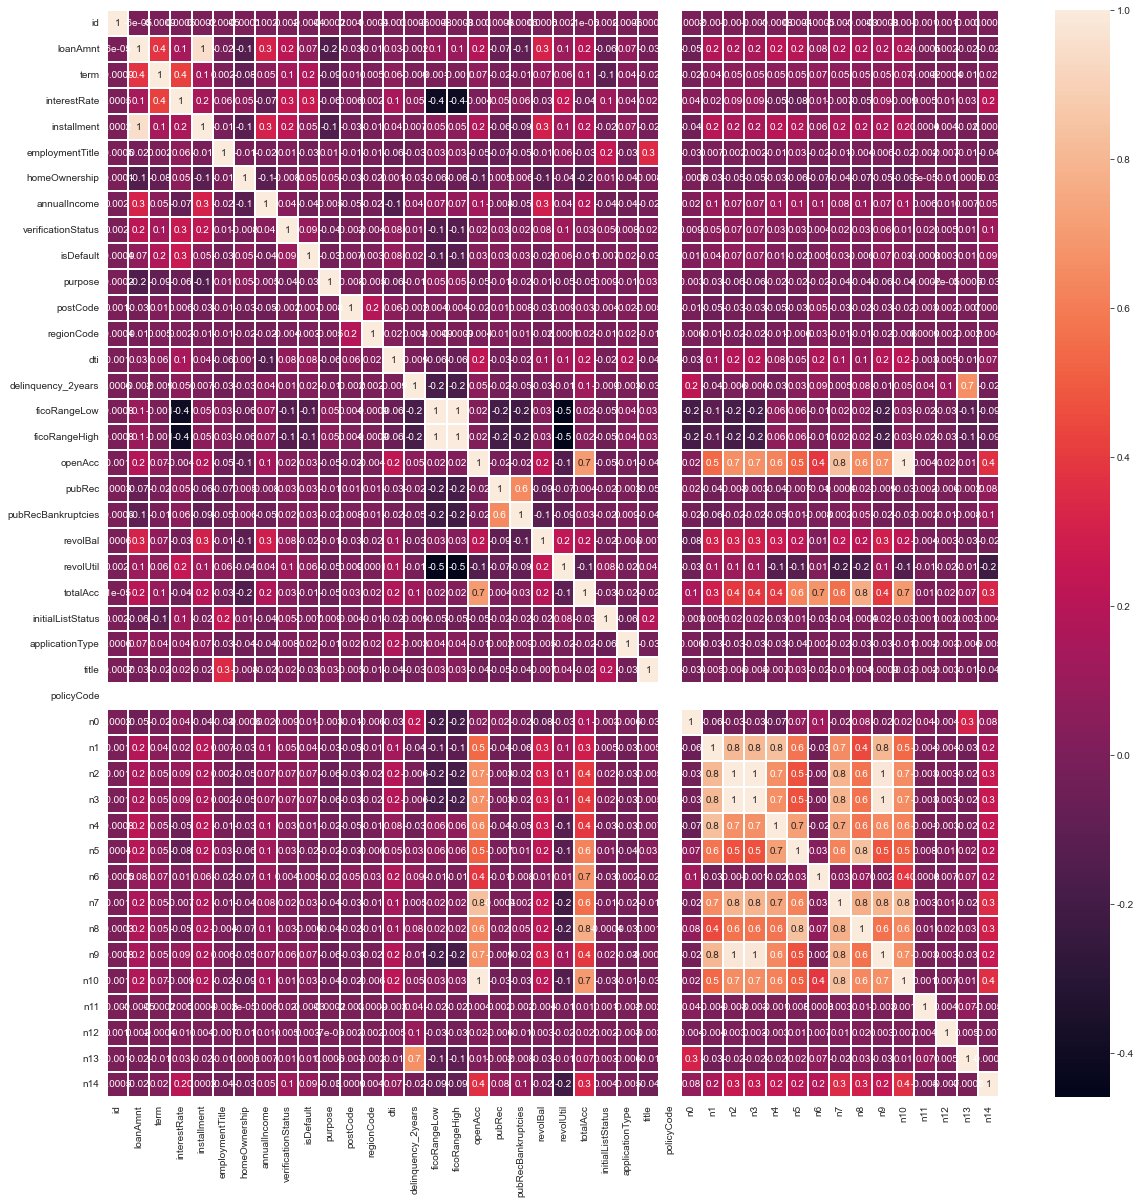

In [40]:
'''数据相关关系'''
f, ax = plt.subplots(1,1, figsize = (20,20))
cor = train[numerical_feature].corr()
sns.heatmap(cor, annot = True, linewidth = 0.2, linecolor = "white", ax = ax, fmt =".1g" )

##特征工程

In [41]:
'''重复值'''
train.duplicated().sum()

0

In [42]:
'''缺失值填补'''
label = 'isDefault'
Y_label = train['isDefault']
numerical_feature.remove(label)
# 训练集
train[numerical_feature] = train[numerical_feature].fillna(train[numerical_feature].median())
# 测试集
test[numerical_feature] = test[numerical_feature].fillna(train[numerical_feature].median())


In [43]:
'''分类型特征查看'''
train[category_feature]

,grade,subGrade,employmentLength,issueDate,earliesCreditLine
0,E,E2,2 years,2014-07-01,Aug-2001
1,D,D2,5 years,2012-08-01,May-2002
2,D,D3,8 years,2015-10-01,May-2006
3,A,A4,10+ years,2015-08-01,May-1999
4,C,C2,NaN,2016-03-01,Aug-1977
...,...,...,...,...,...
799995,C,C4,7 years,2016-07-01,Aug-2011
799996,A,A4,10+ years,2013-04-01,May-1989
799997,C,C3,10+ years,2015-10-01,Jul-2002
799998,A,A4,10+ years,2015-02-01,Jan-1994


In [44]:
'''分类型特征用众数填补'''
# 训练集
train[category_feature] = train[category_feature].fillna(train[category_feature].mode())
# 测试集
test[category_feature] = test[category_feature].fillna(train[category_feature].mode())


In [45]:
'''查看缺失值情况'''
'''employmentLength 列还存在缺失值'''
train.isnull().sum()


id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           0
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  0
regionCode                0
dti                       0
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies        0
revolBal                  0
revolUtil                 0
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     0
policyCode                0
n0                        0
n1                        0
n2                        0
n3                  

In [46]:
'''employmentLength的分布'''
train.employmentLength  

0           2 years
1           5 years
2           8 years
3         10+ years
4               NaN
            ...    
799995      7 years
799996    10+ years
799997    10+ years
799998    10+ years
799999      5 years
Name: employmentLength, Length: 800000, dtype: object

In [47]:
'''采用决策树来填补就业年限（employmentLength）'''
from sklearn.tree import DecisionTreeClassifier
empLenNotNullInd = train.employmentLength.notnull() # 不是空的行，返回True
columns = ['postCode','regionCode','employmentTitle','annualIncome'] # 用四个特征来预测employmentLength
train_empLen_X  = train.loc[empLenNotNullInd,columns]
train_empLen_y = train.employmentLength[empLenNotNullInd]
DTC = DecisionTreeClassifier() # 实例化
DTC.fit(train_empLen_X ,train_empLen_y) # 训练
print(DTC.score(train_empLen_X ,train_empLen_y))# 0.9809320486828881

# 预测
for data in [train,test]:
    empLenIsNullInd = data.employmentLength.isnull()
    test_empLen_X  = data.loc[empLenIsNullInd,columns]
    empLen_pred = DTC.predict(test_empLen_X)
    data.employmentLength[empLenIsNullInd] = empLen_pred


0.9809320486828881


In [48]:
'''空值数量'''
train.isnull().any().sum()

0

In [49]:
train['employmentLength'][:20]
'''
0       2 years
1       5 years
2       8 years
3     10+ years
4       5 years
5       7 years
6       9 years
7        1 year
8       5 years
9       6 years
10    10+ years
11      3 years
12      2 years
13    10+ years
14      2 years
15      2 years
16      9 years
17     < 1 year
18    10+ years
19      9 years
Name: employmentLength, dtype: object
'''

'\n0       2 years\n1       5 years\n2       8 years\n3     10+ years\n4       5 years\n5       7 years\n6       9 years\n7        1 year\n8       5 years\n9       6 years\n10    10+ years\n11      3 years\n12      2 years\n13    10+ years\n14      2 years\n15      2 years\n16      9 years\n17     < 1 year\n18    10+ years\n19      9 years\nName: employmentLength, dtype: object\n'

In [50]:
train['employmentLength'].value_counts(dropna=False).sort_index()
'''
1 year        55034
10+ years    276853
2 years       76435
3 years       68888
4 years       50893
5 years       54038
6 years       39517
7 years       37175
8 years       37903
9 years       31463
< 1 year      71801
Name: employmentLength, dtype: int64
'''


'\n1 year        55034\n10+ years    276853\n2 years       76435\n3 years       68888\n4 years       50893\n5 years       54038\n6 years       39517\n7 years       37175\n8 years       37903\n9 years       31463\n< 1 year      71801\nName: employmentLength, dtype: int64\n'

In [51]:
'''时间数据处理'''
import datetime
# 转化成时间格式 issueDateDT特征表示数据日期离数据集中日期最早的日期（2007-06-01）的天数
train['issueDate'] = pd.to_datetime(train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
train['issueDateDT'] = train['issueDate'].apply(lambda x: x-startdate).dt.days


In [52]:
'''处理效果'''
train[['issueDate','issueDateDT']]

,issueDate,issueDateDT
0,2014-07-01,2587
1,2012-08-01,1888
2,2015-10-01,3044
3,2015-08-01,2983
4,2016-03-01,3196
...,...,...
799995,2016-07-01,3318
799996,2013-04-01,2131
799997,2015-10-01,3044
799998,2015-02-01,2802


In [53]:
'''测试集时间数据处理'''
#转化成时间格式
test['issueDate'] = pd.to_datetime(train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
test['issueDateDT'] = test['issueDate'].apply(lambda x: x-startdate).dt.days

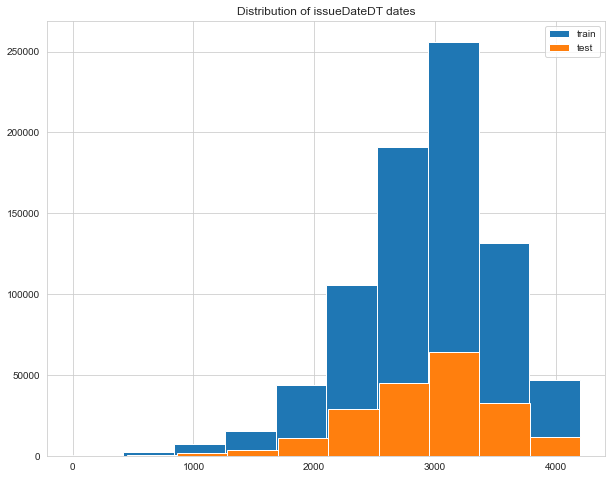

In [54]:
'''处理效果可视化'''
plt.figure(1 , figsize = (10 , 8))
plt.hist(train['issueDateDT'], label='train');
plt.hist(test['issueDateDT'], label='test');
plt.legend();
plt.title('Distribution of issueDateDT dates');
#train 和 test issueDateDT 日期有重叠 所以使用基于时间的分割进行验证是不明智的


In [55]:
train[['issueDate','earliesCreditLine']]
'''
         issueDate earliesCreditLine
0       2014-07-01          Aug-2001
1       2012-08-01          May-2002
2       2015-10-01          May-2006
3       2015-08-01          May-1999
4       2016-03-01          Aug-1977
           ...               ...
799995  2016-07-01          Aug-2011
799996  2013-04-01          May-1989
799997  2015-10-01          Jul-2002
799998  2015-02-01          Jan-1994
799999  2018-08-01          Feb-2002

[800000 rows x 2 columns]
'''

'\n         issueDate earliesCreditLine\n0       2014-07-01          Aug-2001\n1       2012-08-01          May-2002\n2       2015-10-01          May-2006\n3       2015-08-01          May-1999\n4       2016-03-01          Aug-1977\n           ...               ...\n799995  2016-07-01          Aug-2011\n799996  2013-04-01          May-1989\n799997  2015-10-01          Jul-2002\n799998  2015-02-01          Jan-1994\n799999  2018-08-01          Feb-2002\n\n[800000 rows x 2 columns]\n'

In [56]:
'''特征交叉'''

train_earliesCreditLine_year = train['earliesCreditLine'].apply(lambda x:x[-4:]).astype('int64')
test_earliesCreditLine_year = test['earliesCreditLine'].apply(lambda x:x[-4:]).astype('int64')

train_issueDate_year = train['issueDate'].astype('str').apply(lambda x:x[:4]).astype('int64')
test_issueDate_year = test['issueDate'].astype('str').apply(lambda x:x[:4]).astype('int64')

train['CreditLine'] = train_issueDate_year - train_earliesCreditLine_year
test['CreditLine'] = test_issueDate_year - test_earliesCreditLine_year

train = train.drop(['earliesCreditLine','issueDate'],axis=1)
test = test.drop(['earliesCreditLine','issueDate'],axis=1)

In [57]:
'''特征交叉结果'''
train['CreditLine']
'''
        CreditLine
0         13
1         10
2          9
3         16
4         39
          ..
799995     5
799996    24
799997    13
799998    21
799999    16
Name: CreditLine, Length: 800000, dtype: int64
'''


'\n        CreditLine\n0         13\n1         10\n2          9\n3         16\n4         39\n          ..\n799995     5\n799996    24\n799997    13\n799998    21\n799999    16\nName: CreditLine, Length: 800000, dtype: int64\n'

In [58]:
'''特征编码'''
def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
for data in [train, test]:
    data['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
    data['employmentLength'].replace('< 1 year', '0 years', inplace=True)
    data['employmentLength'] = data['employmentLength'].apply(employmentLength_to_int)


In [59]:
train['employmentLength'][:20]
'''
0       2 years
1       5 years
2       8 years
3     10+ years
4       5 years
5       7 years
6       9 years
7        1 year
8       5 years
9       6 years
10    10+ years
11      3 years
12      2 years
13    10+ years
14      2 years
15      2 years
16      9 years
17     < 1 year
18    10+ years
19      9 years
Name: employmentLength, dtype: object
'''


'\n0       2 years\n1       5 years\n2       8 years\n3     10+ years\n4       5 years\n5       7 years\n6       9 years\n7        1 year\n8       5 years\n9       6 years\n10    10+ years\n11      3 years\n12      2 years\n13    10+ years\n14      2 years\n15      2 years\n16      9 years\n17     < 1 year\n18    10+ years\n19      9 years\nName: employmentLength, dtype: object\n'

In [60]:
train['employmentLength']
'''
0          2
1          5
2          8
3         10
4          5
          ..
799995     7
799996    10
799997    10
799998    10
799999     5
Name: employmentLength, Length: 800000, dtype: int64
'''


'\n0          2\n1          5\n2          8\n3         10\n4          5\n          ..\n799995     7\n799996    10\n799997    10\n799998    10\n799999     5\nName: employmentLength, Length: 800000, dtype: int64\n'

In [61]:
a2z = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
a2z_code = np.arange(1,27)
a2z_mapping = dict(zip(a2z, a2z_code))

for data in [train,test]:
    data.loc[:,['grade','subGrade']] = data.loc[:,['grade','subGrade']].applymap(lambda g:g.replace(g[0], str(a2z.index(g[0])+1))).astype('int')


In [62]:
train[['grade','subGrade']]


,grade,subGrade
0,5,52
1,4,42
2,4,43
3,1,14
4,3,32
...,...,...
799995,3,34
799996,1,14
799997,3,33
799998,1,14


In [63]:
train[['grade','subGrade']]


,grade,subGrade
0,5,52
1,4,42
2,4,43
3,1,14
4,3,32
...,...,...
799995,3,34
799996,1,14
799997,3,33
799998,1,14


In [64]:
train[['homeOwnership','verificationStatus','purpose']]
'''
        homeOwnership  verificationStatus  purpose
0                   2                   2        1
1                   0                   2        0
2                   0                   2        0
3                   1                   1        4
4                   1                   2       10
              ...                 ...      ...
799995              1                   0        0
799996              0                   2        4
799997              1                   2        0
799998              0                   2        4
799999              0                   0        4

[800000 rows x 3 columns]
'''


'\n        homeOwnership  verificationStatus  purpose\n0                   2                   2        1\n1                   0                   2        0\n2                   0                   2        0\n3                   1                   1        4\n4                   1                   2       10\n              ...                 ...      ...\n799995              1                   0        0\n799996              0                   2        4\n799997              1                   2        0\n799998              0                   2        4\n799999              0                   0        4\n\n[800000 rows x 3 columns]\n'

In [65]:
train.shape# (800000, 47)


(800000, 47)

In [66]:
'''独热编码'''
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse=False)
oh.fit(train[['homeOwnership','verificationStatus','purpose']])
OneHot1 = oh.transform(train[['homeOwnership','verificationStatus','purpose']])
OneHot2 = oh.transform(test[['homeOwnership','verificationStatus','purpose']])

OneHot1.shape# (800000, 23)
'''
array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])
'''

train = pd.concat([train, pd.DataFrame(OneHot1)], axis=1)
test = pd.concat([test, pd.DataFrame(OneHot2)], axis=1)

train = train.drop(['homeOwnership','verificationStatus','purpose'],axis=1)
test = test.drop(['homeOwnership','verificationStatus','purpose'],axis=1)

train.shape# (800000, 67)


(800000, 67)

In [67]:

train['loanAmnt_bin3'] = pd.qcut(train['loanAmnt'], 10, labels=False)


In [68]:
train=train.drop(["id"],axis=1) 
train.shape # (800000, 66)


(800000, 67)

In [69]:
test=test.drop(["id"],axis=1) 
test.shape # (200000, 65)


(200000, 65)

In [70]:
train.corr()["isDefault"].sort_values()


ficoRangeLow    -0.130994
ficoRangeHigh   -0.130993
6               -0.085972
0               -0.069264
annualIncome    -0.042782
                   ...   
interestRate     0.259202
grade            0.261858
subGrade         0.266415
isDefault        1.000000
policyCode            NaN
Name: isDefault, Length: 67, dtype: float64

In [71]:
train=train.drop(["initialListStatus","n5","n11","n12","n8","postCode","policyCode"],axis=1)
test=test.drop(["initialListStatus","n5","n11","n12","n8","postCode","policyCode"],axis=1)

train.shape# (800000, 59)


(800000, 60)

In [72]:
# 显示相关性高于0.6的变量
def getHighRelatedFeatureDf(corr_matrix, corr_threshold):
    highRelatedFeatureDf = pd.DataFrame(corr_matrix[corr_matrix>corr_threshold].stack().reset_index())
    highRelatedFeatureDf.rename({'level_0':'feature_x', 'level_1':'feature_y', 0:'corr'}, axis=1, inplace=True)
    highRelatedFeatureDf = highRelatedFeatureDf[highRelatedFeatureDf.feature_x != highRelatedFeatureDf.feature_y]
    highRelatedFeatureDf['feature_pair_key'] = highRelatedFeatureDf.loc[:,['feature_x', 'feature_y']].apply(lambda r:'#'.join(np.sort(r.values)), axis=1)
    highRelatedFeatureDf.drop_duplicates(subset=['feature_pair_key'],inplace=True)
    highRelatedFeatureDf.drop(['feature_pair_key'], axis=1, inplace=True)
    return highRelatedFeatureDf

getHighRelatedFeatureDf(train.corr(),0.6)

'''
              feature_x           feature_y      corr
2              loanAmnt         installment  0.953369
5          interestRate               grade  0.953269
6          interestRate            subGrade  0.970847
11                grade            subGrade  0.993907
22   delinquency_2years                 n13  0.658946
24         ficoRangeLow       ficoRangeHigh  1.000000
28              openAcc            totalAcc  0.700796
29              openAcc                  n2  0.658807
30              openAcc                  n3  0.658807
31              openAcc                  n4  0.618207
32              openAcc                  n7  0.830624
33              openAcc                  n8  0.646342
34              openAcc                  n9  0.660917
35              openAcc                 n10  0.998717
37               pubRec  pubRecBankruptcies  0.644402
44             totalAcc                  n5  0.623639
45             totalAcc                  n6  0.678482
46             totalAcc                  n8  0.761854
47             totalAcc                 n10  0.697192
53                   n1                  n2  0.807789
54                   n1                  n3  0.807789
55                   n1                  n4  0.829016
56                   n1                  n7  0.651852
57                   n1                  n9  0.800925
61                   n2                  n3  1.000000
62                   n2                  n4  0.663186
63                   n2                  n7  0.790337
64                   n2                  n9  0.982015
65                   n2                 n10  0.655296
70                   n3                  n4  0.663186
71                   n3                  n7  0.790337
72                   n3                  n9  0.982015
73                   n3                 n10  0.655296
79                   n4                  n5  0.717936
80                   n4                  n7  0.742157
81                   n4                  n9  0.639867
82                   n4                 n10  0.614658
86                   n5                  n7  0.618970
87                   n5                  n8  0.838066
97                   n7                  n8  0.774955
98                   n7                  n9  0.794465
99                   n7                 n10  0.829799
105                  n8                 n10  0.640729
113                  n9                 n10  0.660395
'''


'\n              feature_x           feature_y      corr\n2              loanAmnt         installment  0.953369\n5          interestRate               grade  0.953269\n6          interestRate            subGrade  0.970847\n11                grade            subGrade  0.993907\n22   delinquency_2years                 n13  0.658946\n24         ficoRangeLow       ficoRangeHigh  1.000000\n28              openAcc            totalAcc  0.700796\n29              openAcc                  n2  0.658807\n30              openAcc                  n3  0.658807\n31              openAcc                  n4  0.618207\n32              openAcc                  n7  0.830624\n33              openAcc                  n8  0.646342\n34              openAcc                  n9  0.660917\n35              openAcc                 n10  0.998717\n37               pubRec  pubRecBankruptcies  0.644402\n44             totalAcc                  n5  0.623639\n45             totalAcc                  n6  0.678482\n46     

In [73]:
col = ['installment','ficoRangeHigh','openAcc','n3','n9']
for data in [train,test]:
    data.drop(col,axis=1,inplace=True)


In [74]:
train.shape # (800000, 54)



(800000, 55)

In [75]:
train.var().sort_values()


4                     4.124835e-05
5                     1.012399e-04
3                     2.311968e-04
22                    2.374439e-04
20                    6.920213e-04
21                    1.700849e-03
15                    5.412886e-03
16                    6.671150e-03
19                    7.015095e-03
17                    1.070416e-02
10                    1.125295e-02
18                    1.141417e-02
applicationType       1.889629e-02
12                    2.149093e-02
14                    5.449902e-02
11                    6.091534e-02
2                     9.624693e-02
pubRecBankruptcies    1.424212e-01
isDefault             1.597075e-01
13                    1.712028e-01
6                     2.106089e-01
8                     2.143586e-01
7                     2.372906e-01
1                     2.394067e-01
9                     2.435811e-01
n13                   2.464878e-01
0                     2.499719e-01
pubRec                3.678020e-01
term                

In [76]:
col = ['applicationType']
for data in [train,test]:
    data.drop(col,axis=1,inplace=True)


In [77]:
train.shape  # (800000, 53)
    

(800000, 54)

In [78]:
label=train['isDefault']

label.value_counts()/len(label)
'''
0    0.800488
1    0.199513
Name: isDefault, dtype: float64
'''


'\n0    0.800488\n1    0.199513\nName: isDefault, dtype: float64\n'

In [79]:
import imblearn
from imblearn.over_sampling import SMOTE
over_samples = SMOTE(random_state=2022,k_neighbors=5) 
train_over,label_over = over_samples.fit_resample(train, label)

train_over.to_csv('train_over.csv',index=False)
label_over.to_csv('label_over.csv',index=False)

print(label_over.value_counts()/len(label_over))
print(train_over.shape)


0    0.5
1    0.5
Name: isDefault, dtype: float64
(1280780, 54)


In [80]:
from imblearn.under_sampling import RandomUnderSampler
under_samples = RandomUnderSampler(random_state=1234)
train_under, label_under = under_samples.fit_resample(train,label)

train_under.to_csv('train_under.csv',index=False)
label_under.to_csv('label_under.csv',index=False)

print(label_under.value_counts()/len(label_under))
print(train_under.shape)


0    0.5
1    0.5
Name: isDefault, dtype: float64
(319220, 54)


##建模分析

模型评分:0.807085
查准率： 0.5779298751200769
召回率： 0.12068403500413731
准确率： 0.807085
F1分数： 0.19967226036632163
AUC:    0.7323144371824548


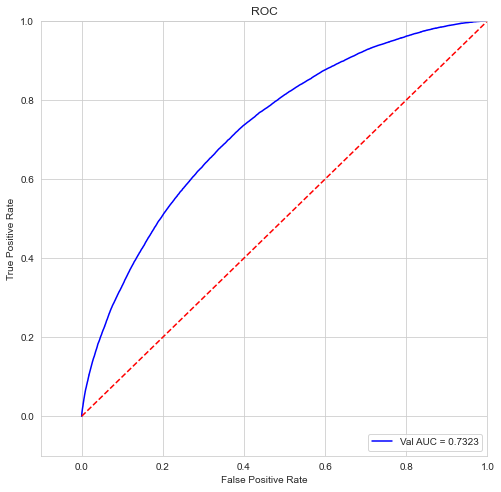

In [85]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
"""原数据的模型训练"""
X = train.drop(['isDefault'], axis=1)
y = train.loc[:,'isDefault']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.25,random_state=2022)
from xgboost.sklearn import XGBClassifier
clf1 = XGBClassifier(n_jobs=-1)
clf1.fit(Xtrain,Ytrain)
print("模型评分:{}".format(clf1.score(Xtest,Ytest)))
print("查准率：",metrics.precision_score(Ytest, np.round(clf1.predict(Xtest))))
print("召回率：",metrics.recall_score(Ytest, np.round(clf1.predict(Xtest))))
print("准确率：",metrics.accuracy_score(Ytest, np.round(clf1.predict(Xtest))))
print("F1分数：",metrics.f1_score(Ytest, np.round(clf1.predict(Xtest))))
print("AUC:   ",roc_auc_score(Ytest, clf1.predict_proba(Xtest)[:,1]))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = metrics.roc_curve(Ytest, clf1.predict_proba(Xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(-0.01,1)
plt.xlim(-0.01,1)
plt.legend(loc = 'lower right')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

# from sklearn.metrics import roc_curve, auc
# predict_proba = clf1.predict_proba(Xtest)
# false_positive_rate, true_positive_rate, thresholds = roc_curve(Ytest, predict_proba[:,1])
# print("AUC:{}".format(auc(false_positive_rate, true_positive_rate)))


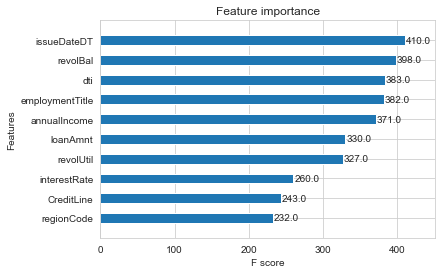

In [86]:
# plot feature importance using built-in function
from xgboost import plot_importance
# plot feature importance
plot_importance(clf1, max_num_features=10, height=0.5, title='Feature importance' )
plt.show()

模型评分:0.8778025890472994
查准率： 0.9728567399887197
召回率： 0.7769075337966757
准确率： 0.8778025890472994
F1分数： 0.8639103471543499
AUC:   0.9322033011559647


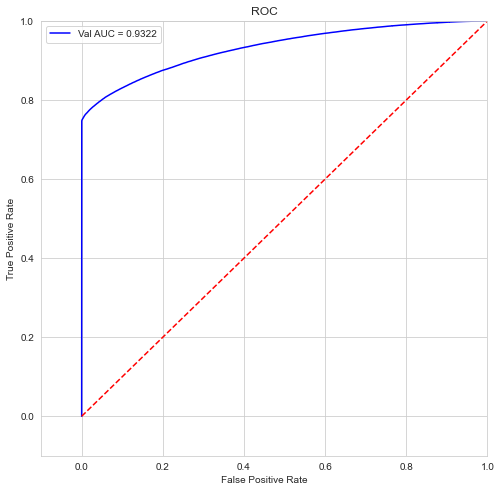

In [87]:
"""上抽样数据的模型训练"""
X1 = train_over.drop(['isDefault'], axis=1)
y1 = train_over.loc[:,'isDefault']
X1train, X1test, Y1train, Y1test = train_test_split(X1,y1,test_size=0.25,random_state=2022)
from xgboost.sklearn import XGBClassifier
clf2 = XGBClassifier(n_jobs=-1)
clf2.fit(X1train,Y1train)
print("模型评分:{}".format(clf2.score(X1test,Y1test)))
print("查准率：",metrics.precision_score(Y1test, np.round(clf2.predict_proba(X1test)[:,1])))
print("召回率：",metrics.recall_score(Y1test, np.round(clf2.predict_proba(X1test)[:,1])))
print("准确率：",metrics.accuracy_score(Y1test, np.round(clf2.predict_proba(X1test)[:,1])))
print("F1分数：",metrics.f1_score(Y1test, np.round(clf2.predict_proba(X1test)[:,1])))
print("AUC:   {}".format(roc_auc_score(Y1test, clf2.predict_proba(X1test)[:,1])))

# from sklearn.metrics import roc_curve, auc
# predict_proba = clf2.predict_proba(X1test)
# false_positive_rate, true_positive_rate, thresholds = roc_curve(Y1test, predict_proba[:,1])
# print("AUC:{}".format(auc(false_positive_rate, true_positive_rate)))

"""画出roc曲线图"""
fpr, tpr, threshold = metrics.roc_curve(Y1test, clf2.predict_proba(X1test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(-0.01,1)
plt.xlim(-0.01,1)
plt.legend(loc = 'best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

模型评分： 0.6969174863730343
查准率： 0.6685768512566198
召回率： 0.6831401349990304
准确率： 0.6727494183232093
F1分数： 0.6757800413381685
AUC:   0.7393573093904839


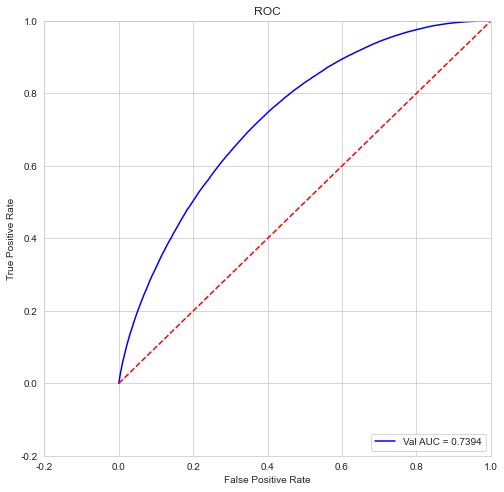

In [88]:
"""下抽样数据的模型训练"""
from xgboost.sklearn import XGBClassifier
clf3 = XGBClassifier(n_jobs=-1)
clf3.fit(train_under.drop(['isDefault'], axis=1),label_under)
clf3.score(train_under.drop(['isDefault'], axis=1),label_under)

from sklearn.metrics import roc_curve, auc
predict_proba = clf3.predict_proba(X1test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y1test, predict_proba[:,1])
print("模型评分：",clf3.score(train_under.drop(['isDefault'], axis=1),label_under))
print("查准率：",metrics.precision_score(Y1test, np.round(clf3.predict_proba(X1test)[:,1])))
print("召回率：",metrics.recall_score(Y1test, np.round(clf3.predict_proba(X1test)[:,1])))
print("准确率：",metrics.accuracy_score(Y1test, np.round(clf3.predict_proba(X1test)[:,1])))
print("F1分数：",metrics.f1_score(Y1test, np.round(clf3.predict_proba(X1test)[:,1])))
print("AUC:   {}".format(roc_auc_score(Y1test, clf3.predict_proba(X1test)[:,1])))

# from sklearn.metrics import roc_curve, auc
# predict_proba = clf2.predict_proba(X1test)
# false_positive_rate, true_positive_rate, thresholds = roc_curve(Y1test, predict_proba[:,1])
# print("AUC:{}".format(auc(false_positive_rate, true_positive_rate)))

"""画出roc曲线图"""
fpr, tpr, threshold = metrics.roc_curve(Y1test, clf3.predict_proba(X1test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(-0.01,1)
plt.xlim(-0.01,1)
plt.legend(loc = 'lower right')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

##调参

In [102]:
cv_params = {'max_depth': [ 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {'learning_rate': 0.1, 'n_estimators': 10, 'max_depth': 5, 'min_child_weight':4, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model =XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X1train,Y1train)
# evalute_result = optimized_GBM.grid_scores_
# print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
参数的最佳取值：{'max_depth': 10, 'min_child_weight': 3}
最佳模型得分:0.8634082356064272


In [ ]:
cv_params = {'gaama':[0,0.05,0.1,0.2,0.3]}
other_params = {'learning_rate': 0.1, 'n_estimators': 10, 'max_depth': 5, 'min_child_weight':4, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model =XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X1train,Y1train)
# evalute_result = optimized_GBM.grid_scores_
# print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [105]:
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

参数的最佳取值：{'gamma': 0}
最佳模型得分:0.8634082356064272


In [106]:
cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
other_params = {'learning_rate': 0.1, 'n_estimators':10, 'max_depth': 10, 'min_child_weight':3, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X1train,Y1train)
# evalute_result = optimized_GBM.grid_scores_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
参数的最佳取值：{'colsample_bytree': 0.6, 'subsample': 0.7}
最佳模型得分:0.864831326743599


In [107]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
cv_params = {'reg_alpha': [0.05, 0.1, 0.5,1, 2], 'reg_lambda': [0.1, 0.5, 1, 2, ]}
other_params = {'learning_rate': 0.1, 'n_estimators':10, 'max_depth': 10, 'min_child_weight':3, 'seed': 0,
                    'subsample': 0.7, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X1train,Y1train)
# evalute_result = optimized_GBM.grid_scores_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
参数的最佳取值：{'reg_alpha': 0.5, 'reg_lambda': 0.1}
最佳模型得分:0.8650624359114498


In [108]:
cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}
other_params = {'learning_rate': 0.1, 'n_estimators':50, 'max_depth': 10, 'min_child_weight':3, 'seed': 0,
                    'subsample': 0.6, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_alpha': 0.5, 'reg_lambda': 0.1}
model = XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(Xtrain,Ytrain)
# evalute_result = optimized_GBM.grid_scores_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
参数的最佳取值：{'learning_rate': 0.1}
最佳模型得分:0.805485


In [109]:
from sklearn.model_selection import GridSearchCV
cv_params = {'n_estimators': [100,300,600,1000]}
other_params = {'learning_rate': 0.1, 'n_estimators':50, 'max_depth': 10, 'min_child_weight':3, 'seed': 0,
                    'subsample': 0.6, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_alpha': 0.5, 'reg_lambda': 0.1}
model = XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
best_model1=optimized_GBM .fit(X1train,Y1train)
# evalute_result = optimized_GBM.grid_scores
# print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
参数的最佳取值：{'n_estimators': 100}
最佳模型得分:0.8781721555094031


模型评分:0.6095879073689471
查准率： 0.9439871562906144
召回率： 0.23173165345661326
准确率： 0.6095879073689471
F1分数： 0.3721156840487408
AUC:   0.8429250240805215


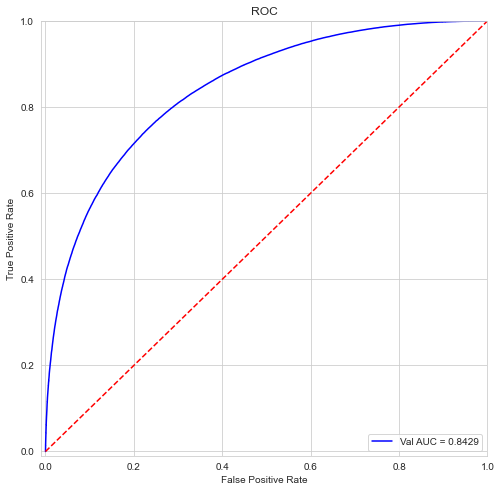

In [121]:
# other_params = {'learning_rate': 0.1, 'n_estimators':50, 'max_depth': 10, 'min_child_weight':3, 'seed': 0,
#                     'subsample': 0.6, 'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_alpha': 0.5, 'reg_lambda': 0.1}
from xgboost.sklearn import XGBClassifier
clf4 = XGBClassifier(
				learning_rate= 0.1, 
				n_estimators= 1000, 
				max_depth= 10, 
				min_child_weight= 3, 
				seed= 0,
                subsample= 0.9, 
                colsample_bytree= 0.7, 
                gamma= 0, 
                reg_alpha=0.5, 
                reg_lambda=0.1,
                objective= 'binary:logistic',
               )
# X2 = train_under.drop(['isDefault'], axis=1)
# y2 = train_under.loc[:,'isDefault']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.25,random_state=2022)
clf4.fit(Xtrain,Ytrain)
y_pred = clf4.predict(Xtest)
#auc
from sklearn.metrics import roc_auc_score
print("模型评分:{}".format(clf4.score(X1test,Y1test)))
print("查准率：",metrics.precision_score(Y1test, np.round(clf4.predict_proba(X1test)[:,1])))
print("召回率：",metrics.recall_score(Y1test, np.round(clf4.predict_proba(X1test)[:,1])))
print("准确率：",metrics.accuracy_score(Y1test, np.round(clf4.predict_proba(X1test)[:,1])))
print("F1分数：",metrics.f1_score(Y1test, np.round(clf4.predict_proba(X1test)[:,1])))
print("AUC:   {}".format(roc_auc_score(Y1test, clf4.predict_proba(X1test)[:,1])))

"""画出roc曲线图"""
fpr, tpr, threshold = metrics.roc_curve(Y1test, clf4.predict_proba(X1test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(-0.01,1)
plt.xlim(-0.01,1)
plt.legend(loc = 'lower right')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()


模型评分:0.8775058948453286
查准率： 0.9615687775014349
召回率： 0.7860534365948716
准确率： 0.8775058948453286
F1分数： 0.8649975217534972
AUC:   0.9304864542930493


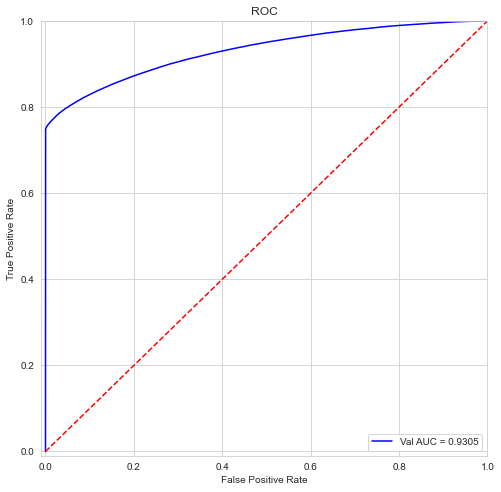

In [120]:
from xgboost.sklearn import XGBClassifier
clf4 = XGBClassifier(
				learning_rate= 0.1, 
				n_estimators= 1000, 
				max_depth= 10, 
				min_child_weight= 3, 
				seed= 0,
                subsample= 0.9, 
                colsample_bytree= 0.7, 
                gamma= 0, 
                reg_alpha=0.5, 
                reg_lambda=0.1,
                objective= 'binary:logistic',
               )
# X2 = train_under.drop(['isDefault'], axis=1)
# y2 = train_under.loc[:,'isDefault']
X1train, X1test, Y1train, Y1test = train_test_split(X1,y1,test_size=0.25,random_state=2022)
clf4.fit(X1train,Y1train)
y_pred = clf4.predict(X1test)
#auc
from sklearn.metrics import roc_auc_score
print("模型评分:{}".format(clf4.score(X1test,Y1test)))
print("查准率：",metrics.precision_score(Y1test, np.round(clf4.predict_proba(X1test)[:,1])))
print("召回率：",metrics.recall_score(Y1test, np.round(clf4.predict_proba(X1test)[:,1])))
print("准确率：",metrics.accuracy_score(Y1test, np.round(clf4.predict_proba(X1test)[:,1])))
print("F1分数：",metrics.f1_score(Y1test, np.round(clf4.predict_proba(X1test)[:,1])))
print("AUC:   {}".format(roc_auc_score(Y1test, clf4.predict_proba(X1test)[:,1])))

"""画出roc曲线图"""
fpr, tpr, threshold = metrics.roc_curve(Y1test, clf4.predict_proba(X1test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(-0.01,1)
plt.xlim(-0.01,1)
plt.legend(loc = 'lower right')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()


模型评分:0.7394993675728853
查准率： 0.725171142086225
召回率： 0.7700324673293588
准确率： 0.7394993675728853
F1分数： 0.7469288065656337
AUC:   0.8139002391429438


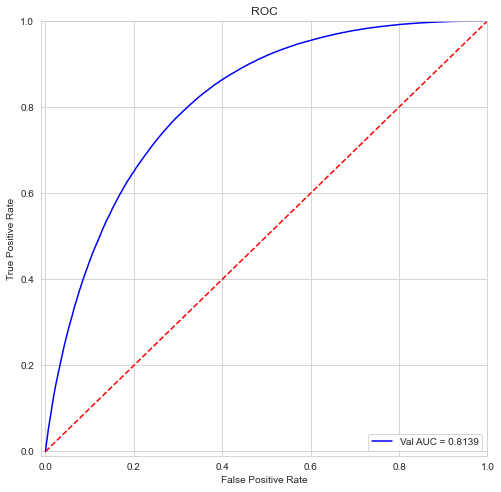

In [122]:
from xgboost.sklearn import XGBClassifier
clf4 = XGBClassifier(
				learning_rate= 0.1, 
				n_estimators= 1000, 
				max_depth= 10, 
				min_child_weight= 3, 
				seed= 0,
                subsample= 0.9, 
                colsample_bytree= 0.7, 
                gamma= 0, 
                reg_alpha=0.5, 
                reg_lambda=0.1,
                objective= 'binary:logistic',
               )
X2 = train_under.drop(['isDefault'], axis=1)
y2 = train_under.loc[:,'isDefault']
X2train, X2test, Y2train, Y2test = train_test_split(X2,y2,test_size=0.25,random_state=2022)
clf4.fit(X2train,Y2train)
y_pred = clf4.predict(X2test)
#auc
from sklearn.metrics import roc_auc_score
print("模型评分:{}".format(clf4.score(X1test,Y1test)))
print("查准率：",metrics.precision_score(Y1test, np.round(clf4.predict_proba(X1test)[:,1])))
print("召回率：",metrics.recall_score(Y1test, np.round(clf4.predict_proba(X1test)[:,1])))
print("准确率：",metrics.accuracy_score(Y1test, np.round(clf4.predict_proba(X1test)[:,1])))
print("F1分数：",metrics.f1_score(Y1test, np.round(clf4.predict_proba(X1test)[:,1])))
print("AUC:   {}".format(roc_auc_score(Y1test, clf4.predict_proba(X1test)[:,1])))

"""画出roc曲线图"""
fpr, tpr, threshold = metrics.roc_curve(Y1test, clf4.predict_proba(X1test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(-0.01,1)
plt.xlim(-0.01,1)
plt.legend(loc = 'lower right')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()


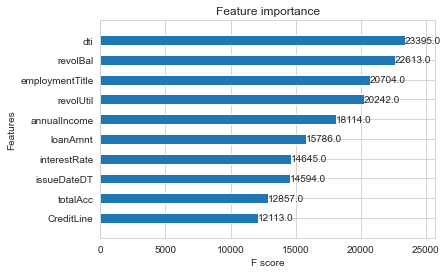

In [116]:
'''下采样数据的特征重要性'''
# plot feature importance using built-in function
from xgboost import plot_importance
# plot feature importance
plot_importance(clf4, max_num_features=10, height=0.5, title='Feature importance' )
plt.show()

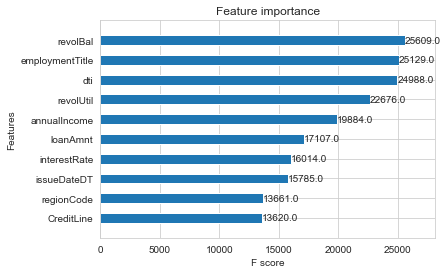

In [125]:
'''原数据的特征重要性'''
from xgboost.sklearn import XGBClassifier
clf5 = XGBClassifier(
				learning_rate= 0.1, 
				n_estimators= 1000, 
				max_depth= 10, 
				min_child_weight= 3, 
				seed= 0,
                subsample= 0.9, 
                colsample_bytree= 0.7, 
                gamma= 0, 
                reg_alpha=0.5, 
                reg_lambda=0.1,
                objective= 'binary:logistic',
               )
X = train.drop(['isDefault'], axis=1)
y= train.loc[:,'isDefault']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.25,random_state=2022)
clf5.fit(Xtrain,Ytrain)
y_pred = clf5.predict(Xtest)
# plot feature importance using built-in function
from xgboost import plot_importance
# plot feature importance
plot_importance(clf5, max_num_features=10, height=0.5, title='Feature importance' )
plt.show()